In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
one = 0
zero = 0
for i in dataset['Outcome']:
    if i == 1:
        one += 1
    else:
        zero += 1

In [4]:
remove = []
for i in range(0, len(dataset)):
    if dataset['Outcome'][i] == 0 and zero != one:
        zero -= 1
        remove.append(i)

In [5]:
data = []
for i in range(0, len(dataset)):
    if i not in remove:
        data.append(dataset.iloc[i])

In [6]:
dataset = pd.DataFrame(data)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [7]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,128.0,68.0,19.0,180.0,30.5,1.391,25.0,1.0
1,10.0,75.0,82.0,0.0,0.0,33.3,0.263,38.0,0.0
2,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0,1.0
3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0.0
4,1.0,71.0,62.0,0.0,0.0,21.8,0.416,26.0,0.0
...,...,...,...,...,...,...,...,...,...
531,8.0,186.0,90.0,35.0,225.0,34.5,0.423,37.0,1.0
532,1.0,163.0,72.0,0.0,0.0,39.0,1.222,33.0,1.0
533,4.0,109.0,64.0,44.0,99.0,34.8,0.905,26.0,1.0
534,2.0,93.0,64.0,32.0,160.0,38.0,0.674,23.0,1.0


In [8]:
n_rows = dataset.shape[0]
n_test = int(0.1 * n_rows // 1)
train_dataset = dataset[0 : n_rows - n_test]
test_dataset = dataset[n_rows - n_test : n_rows]
cols = train_dataset.columns

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               483 non-null    float64
 1   Glucose                   483 non-null    float64
 2   BloodPressure             483 non-null    float64
 3   SkinThickness             483 non-null    float64
 4   Insulin                   483 non-null    float64
 5   BMI                       483 non-null    float64
 6   DiabetesPedigreeFunction  483 non-null    float64
 7   Age                       483 non-null    float64
 8   Outcome                   483 non-null    float64
dtypes: float64(9)
memory usage: 34.1 KB


In [10]:
train_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.094510,0.150425,-0.097302,-0.082071,-0.030959,-0.031831,0.532953,0.256269
Glucose,0.094510,1.000000,0.143762,0.084669,0.297952,0.212249,0.115717,0.243633,0.492381
BloodPressure,0.150425,0.143762,1.000000,0.236077,0.085754,0.241727,0.060504,0.257039,0.043645
SkinThickness,-0.097302,0.084669,0.236077,1.000000,0.438025,0.391877,0.210181,-0.097119,0.061147
Insulin,-0.082071,0.297952,0.085754,0.438025,1.000000,0.157663,0.145405,-0.011531,0.130003
BMI,-0.030959,0.212249,0.241727,0.391877,0.157663,1.000000,0.183572,-0.026559,0.294444
DiabetesPedigreeFunction,-0.031831,0.115717,0.060504,0.210181,0.145405,0.183572,1.000000,-0.006725,0.148462
Age,0.532953,0.243633,0.257039,-0.097119,-0.011531,-0.026559,-0.006725,1.000000,0.262698
Outcome,0.256269,0.492381,0.043645,0.061147,0.130003,0.294444,0.148462,0.262698,1.000000


<AxesSubplot: >

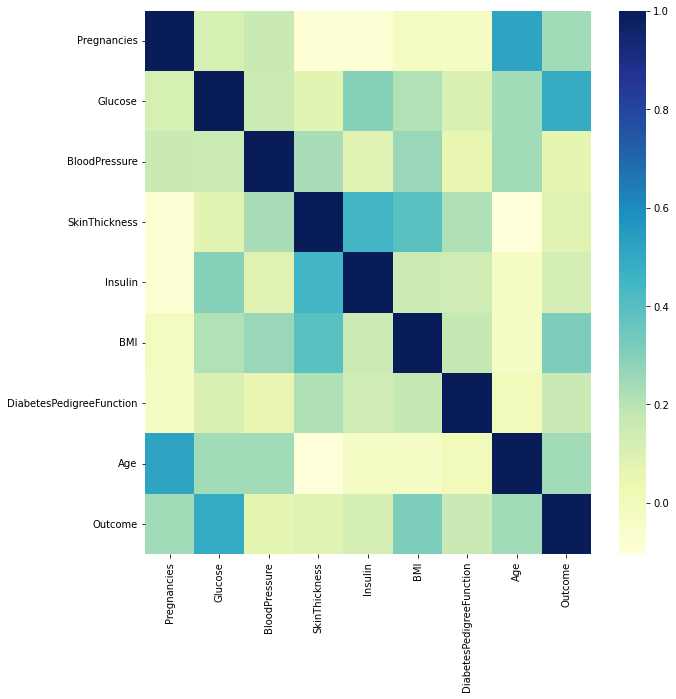

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu")

In [12]:
train_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,128.0,68.0,19.0,180.0,30.5,1.391,25.0,1.0
1,10.0,75.0,82.0,0.0,0.0,33.3,0.263,38.0,0.0
2,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0,1.0
3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0.0
4,1.0,71.0,62.0,0.0,0.0,21.8,0.416,26.0,0.0
...,...,...,...,...,...,...,...,...,...
478,9.0,165.0,88.0,0.0,0.0,30.4,0.302,49.0,1.0
479,3.0,170.0,64.0,37.0,225.0,34.5,0.356,30.0,1.0
480,6.0,114.0,0.0,0.0,0.0,0.0,0.189,26.0,0.0
481,2.0,99.0,0.0,0.0,0.0,22.2,0.108,23.0,0.0


In [13]:
train_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,4.037267,125.627329,69.701863,20.898551,85.867495,32.839545,0.493826,34.045549,0.490683
std,3.545592,32.149899,20.295282,16.478581,121.067790,7.685312,0.343427,11.744779,0.500432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.950000,0.252000,25.000000,0.000000
50%,3.000000,123.000000,72.000000,24.000000,15.000000,32.500000,0.395000,30.000000,0.000000
75%,6.000000,146.000000,80.000000,33.000000,140.000000,37.250000,0.655000,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
X = train_dataset.iloc[:, 0 : 8]
y = train_dataset.iloc[:, 8]

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,128.0,68.0,19.0,180.0,30.5,1.391,25.0
1,10.0,75.0,82.0,0.0,0.0,33.3,0.263,38.0
2,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0
3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0
4,1.0,71.0,62.0,0.0,0.0,21.8,0.416,26.0
...,...,...,...,...,...,...,...,...
478,9.0,165.0,88.0,0.0,0.0,30.4,0.302,49.0
479,3.0,170.0,64.0,37.0,225.0,34.5,0.356,30.0
480,6.0,114.0,0.0,0.0,0.0,0.0,0.189,26.0
481,2.0,99.0,0.0,0.0,0.0,22.2,0.108,23.0


In [16]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
478    1.0
479    1.0
480    0.0
481    0.0
482    0.0
Name: Outcome, Length: 483, dtype: float64

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, shuffle = False)

# Decision Tree

In [18]:
X_train_dt = X_train.copy()
X_valid_dt = X_valid.copy()
test_dataset_dt = test_dataset.copy()
cut_off = [3.829480, 120.497110, 68.924855, 20.423410, 79.387283, 31.876445, 0.476223, 33.15896]

In [19]:
for i in range(0, len(cols) - 1):
    X_train_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in X_train_dt[cols[i]]]
    X_valid_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in X_valid_dt[cols[i]]]
    test_dataset_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in test_dataset_dt[cols[i]]]

In [20]:
X_train_dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0,1,1,0,1,0,1
1,0,1,0,1,1,0,1,0
2,1,0,1,0,0,0,1,1
3,0,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
381,1,0,0,0,1,0,1,1
382,1,0,1,0,0,0,1,1
383,0,1,0,1,1,0,0,0
384,1,0,0,1,1,1,0,0


In [21]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if y_train[i] == 0:
        total_zero += 1
    else:
        total_one += 1
    total += 1
entropy_level0_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [22]:
entropy_level0 = []
for i in range(0, len(cols) - 1):
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
            one += 1
        elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
            two += 1
        elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
            three += 1
        elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
            four += 1

    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level0.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [23]:
entropy_level0

[0.9499884030430796,
 0.8787213483287395,
 0.9897164379979548,
 0.9878171035583563,
 0.9930759270988931,
 0.9549053715215121,
 0.9938611776850717,
 0.9542052991951002]

In [24]:
info_gain_level0 = []
for i in entropy_level0:
    info_gain_level0.append(entropy_level0_whole - i)

In [25]:
info_gain_level0

[0.04952740393702537,
 0.12079445865136551,
 0.00979936898215017,
 0.011698703421748724,
 0.006439879881211863,
 0.04461043545859289,
 0.005654629295033353,
 0.04531050778500478]

In [26]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train_dt)):
    if X_train_dt['Glucose'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1
entropy_level1_no_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [27]:
entropy_level1_no_whole

0.8758037157279309

In [28]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1
entropy_level1_yes_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [29]:
entropy_level1_yes_whole

0.8819578478804562

In [30]:
entropy_level1_no = []
for i in range(0, len(cols) - 1):
    if cols[i] == 'Glucose':
        continue
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt['Glucose'][j] == 0:
            if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
                one += 1
            elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
                two += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
                three += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
                four += 1
    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level1_no.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [31]:
entropy_level1_no

[0.8672585994978435,
 0.8708540254900828,
 0.8749599437001401,
 0.8687930440772802,
 0.8543668738664881,
 0.8689990530224245,
 0.8662219794590484]

In [32]:
entropy_level1_yes = []
for i in range(0, len(cols) - 1):
    if cols[i] == 'Glucose':
        continue
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt['Glucose'][j] == 1:
            if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
                one += 1
            elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
                two += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
                three += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
                four += 1
    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level1_yes.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [33]:
entropy_level1_yes

[0.759728081426642,
 0.8580787780806312,
 0.8668416294634418,
 0.879113860910617,
 0.8502425347565034,
 0.876923000124816,
 0.8244978156959427]

In [34]:
info_gain_level1_no = []
for i in entropy_level1_no:
    info_gain_level1_no.append(entropy_level1_no_whole - i)

In [35]:
info_gain_level1_no

[0.008545116230087468,
 0.004949690237848081,
 0.0008437720277908456,
 0.007010671650650724,
 0.02143684186144279,
 0.006804662705506392,
 0.00958173626888248]

In [36]:
info_gain_level1_yes = []
for i in entropy_level1_yes:
    info_gain_level1_yes.append(entropy_level1_yes_whole - i)

In [37]:
info_gain_level1_yes

[0.12222976645381411,
 0.023879069799825015,
 0.015116218417014382,
 0.0028439869698391185,
 0.031715313123952815,
 0.005034847755640115,
 0.057460032184513454]

In [38]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 0 and X_train_dt['BMI'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [39]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.7633587786259542 Probability of No: 0.2366412213740458


In [40]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 0 and X_train_dt['BMI'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [41]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.5972222222222222 Probability of No: 0.4027777777777778


In [42]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1 and X_train_dt['Pregnancies'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [43]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.5125 Probability of No: 0.4875


In [44]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1 and X_train_dt['Pregnancies'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [45]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.13592233009708737 Probability of No: 0.8640776699029126


In [46]:
'''
Tree is:
                                Glucose
         Less than Mean                          More than Mean
               BMI                                 Pregnancies
Less than Mean     More than Mean      Less than Mean     More than Mean
      Yes               No                  No                 No
'''

'\nTree is:\n                                Glucose\n         Less than Mean                          More than Mean\n               BMI                                 Pregnancies\nLess than Mean     More than Mean      Less than Mean     More than Mean\n      Yes               No                  No                 No\n'

In [47]:
y_pred = []
for i in range(0, len(X_valid_dt)):
    if X_valid_dt['Glucose'][len(X_train_dt) + i] == 0 and X_valid_dt['BMI'][len(X_train_dt) + i] == 0:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
y_valid

386    1.0
387    1.0
388    0.0
389    1.0
390    0.0
      ... 
478    1.0
479    1.0
480    0.0
481    0.0
482    0.0
Name: Outcome, Length: 97, dtype: float64

In [49]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train_dt) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train_dt) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train_dt) + i] == 0:
        tn += 1
    else:
        fn += 1

acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)

print('For validation datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For validation datatset: 
Accuracy is:  0.7731958762886598
Recall is:  0.5897435897435898
Precision is:  0.7931034482758621
F1 Score is:  0.676470588235294
Sensitivity is:  0.5897435897435898
Specificty is:  0.41025641025641024


In [50]:
y_pred = []
for i in range(0, len(test_dataset_dt)):
    if test_dataset_dt['Glucose'][len(X) + i] == 0 and test_dataset_dt['BMI'][len(X) + i] == 0:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset_dt['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset_dt['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset_dt['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1
        
acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)

print('For test datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For test datatset: 
Accuracy is:  0.6792452830188679
Recall is:  0.4838709677419355
Precision is:  0.9375
F1 Score is:  0.6382978723404255
Sensitivity is:  0.4838709677419355
Specificty is:  0.5161290322580645


# Logistic Regression

In [52]:
def dot_product(X, y, cols):
    prod = []
    for i in range(0, len(X)):
        p = 0
        for j in range(0, len(cols) - 1):
            p += X[cols[j]][i] * y[i]
        prod.append(p)
    return prod

In [53]:
def get_difference(y1, y2):
    diff = []
    for i in range(0, len(y1)):
        diff.append(y1[i] - y2[i])
    return diff

In [54]:
def new_weights(weights, d_weights):
    for i in range(0, len(weights)):
        weights[i] += weights[i] * d_weights[i]
    return weights

In [55]:
weights = []
bias = 1
for i in range(0, len(cols) - 1):
    weights.append(0.5)

num_iterations = 10
for k in range(0, num_iterations):
    y_pred = []
    for i in range(0, len(X_train)):
        pred = 0
        for j in range(0, len(cols) - 1):
            pred += X_train[cols[j]][i] * weights[j]
        pred += bias
        y_pred.append(1 / (1 + np.exp(-pred)))
    d_weights = dot_product(X_train, get_difference(y_pred, y_train), cols)
    d_bias = (1 / len(X_train)) * sum(get_difference(y_pred, y_train))
    weights = new_weights(weights, d_weights)
    bias += bias * d_bias

print(weights, bias)

[0.5, 3.1129162361606504e+23, 0.5, 3.973779838678479e+21, 2.1311007287079116e+22, 3.773769479068564e+25, 3.902526007527864e+21, 0.5] 52.87445175153316


In [56]:
y_pred = []
for i in range(0, len(X_valid)):
    pred = 0
    for j in range(0, len(cols) - 1):
        pred += X_valid[cols[j]][len(X_train) + i] * weights[j]
    pred += bias
    y_pred.append(1 / (1 + np.exp(-pred)))

In [57]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train) + i] == 0:
        tn += 1
    else:
        fn += 1

acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)

print('For validation datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For validation datatset: 
Accuracy is:  0.4020618556701031
Recall is:  1.0
Precision is:  0.4020618556701031
F1 Score is:  0.573529411764706
Sensitivity is:  1.0
Specificty is:  0.0


In [58]:
y_pred = []
for i in range(0, len(test_dataset)):
    pred = 0
    for j in range(0, len(cols) - 1):
        pred += test_dataset[cols[j]][len(X) + i] * weights[j]
    pred += bias
    y_pred.append(1 / (1 + np.exp(-pred)))

In [59]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1

acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)

print('For test datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For test datatset: 
Accuracy is:  0.5849056603773585
Recall is:  1.0
Precision is:  0.5849056603773585
F1 Score is:  0.738095238095238
Sensitivity is:  1.0
Specificty is:  0.0


# KNN

In [60]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [61]:
one = 0
zero = 0
for i in range(0, len(X_train)):
    if y_train[i] == 1:
        one += 1
    else:
        zero += 1
print(one, zero)

198 188


In [62]:
one = 0
zero = 0
for i in range(0, len(y_valid)):
    if y_valid[len(X_train) + i] == 1:
        one += 1
    else:
        zero += 1
print(one, zero)

39 58


In [63]:
def get_prediction(distances, i, k):
    nearest = []
    for l in range(0, k):
        mn = 1e10
        ans = -1
        for j in distances[i]:
            if distances[i][j] < mn and j not in nearest:
                mn = distances[i][j]
                ans = j
        nearest.append(ans)
    for i in range(0, len(nearest)):
        nearest[i] = y_train[nearest[i]]
    return nearest

In [64]:
distances = {}
for i in range(0, len(X_valid)):
    distances[i] = {}
    for j in range(0, len(X_train)):
        dist = 0
        for k in range(0, len(cols) - 1):
            dist += abs(X_train[cols[k]][j] - X_valid[cols[k]][len(X_train) + i])
        distances[i][j] = dist

In [65]:
y_pred = []
for i in range(0, len(X_valid)):
    y_pred.append(get_prediction(distances, i, 35))

In [66]:
ks = [1, 3, 5, 7, 9, 15, 25, 35]
for k in ks:
    pred = []
    for i in range(0, len(X_valid)):
        for j in range(0, k):
            one = 0
            zero = 0
            if y_pred[i][j] == 0:
                zero += 1
            else:
                one += 1
        if one > zero:
            pred.append(1)
        else:
            pred.append(0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(pred)):
        if pred[i] == 1 and y_valid[len(X_train) + i] == 1:
            tp += 1
        elif pred[i] == 1 and y_valid[len(X_train) + i] == 0:
            fp += 1
        elif pred[i] == 0 and y_valid[len(X_train) + i] == 0:
            tn += 1
        else:
            fn += 1
            
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = 1 - sens
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * p * r / (p + r)

    print('For validation datatset with k = ', k, ': ')
    print('Accuracy is: ', acc)
    print('Recall is: ', r)
    print('Precision is: ', p)
    print('F1 Score is: ', f1)
    print('Sensitivity is: ', sens)
    print('Specificty is: ', spec)

For validation datatset with k =  1 : 
Accuracy is:  0.7422680412371134
Recall is:  0.6666666666666666
Precision is:  0.6842105263157895
F1 Score is:  0.6753246753246753
Sensitivity is:  0.6666666666666666
Specificty is:  0.33333333333333337
For validation datatset with k =  3 : 
Accuracy is:  0.6494845360824743
Recall is:  0.717948717948718
Precision is:  0.5490196078431373
F1 Score is:  0.6222222222222223
Sensitivity is:  0.717948717948718
Specificty is:  0.28205128205128205
For validation datatset with k =  5 : 
Accuracy is:  0.6701030927835051
Recall is:  0.6666666666666666
Precision is:  0.5777777777777777
F1 Score is:  0.619047619047619
Sensitivity is:  0.6666666666666666
Specificty is:  0.33333333333333337
For validation datatset with k =  7 : 
Accuracy is:  0.6288659793814433
Recall is:  0.5897435897435898
Precision is:  0.5348837209302325
F1 Score is:  0.5609756097560975
Sensitivity is:  0.5897435897435898
Specificty is:  0.41025641025641024
For validation datatset with k =  9

In [67]:
distances = {}
for i in range(0, len(test_dataset)):
    distances[i] = {}
    for j in range(0, len(X_train)):
        dist = 0
        for k in range(0, len(cols) - 1):
            dist += abs(X_train[cols[k]][j] - test_dataset[cols[k]][len(X) + i])
        distances[i][j] = dist

In [68]:
y_pred = []
for i in range(0, len(test_dataset)):
    y_pred.append(get_prediction(distances, i, 35))

In [69]:
ks = [5, 15, 25, 35]
for k in ks:
    pred = []
    for i in range(0, len(test_dataset)):
        for j in range(0, k):
            one = 0
            zero = 0
            if y_pred[i][j] == 0:
                zero += 1
            else:
                one += 1
        if one > zero:
            pred.append(1)
        else:
            pred.append(0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(pred)):
        if pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
            tp += 1
        elif pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
            fp += 1
        elif pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
            tn += 1
        else:
            fn += 1
    
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = 1 - sens
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * p * r / (p + r)

    print('For validation datatset with k = ', k, ': ')
    print('Accuracy is: ', acc)
    print('Recall is: ', r)
    print('Precision is: ', p)
    print('F1 Score is: ', f1)
    print('Sensitivity is: ', sens)
    print('Specificty is: ', spec)

For validation datatset with k =  5 : 
Accuracy is:  0.660377358490566
Recall is:  0.5806451612903226
Precision is:  0.782608695652174
F1 Score is:  0.6666666666666667
Sensitivity is:  0.5806451612903226
Specificty is:  0.4193548387096774
For validation datatset with k =  15 : 
Accuracy is:  0.6037735849056604
Recall is:  0.5161290322580645
Precision is:  0.7272727272727273
F1 Score is:  0.6037735849056604
Sensitivity is:  0.5161290322580645
Specificty is:  0.4838709677419355
For validation datatset with k =  25 : 
Accuracy is:  0.5283018867924528
Recall is:  0.3548387096774194
Precision is:  0.6875
F1 Score is:  0.4680851063829787
Sensitivity is:  0.3548387096774194
Specificty is:  0.6451612903225806
For validation datatset with k =  35 : 
Accuracy is:  0.660377358490566
Recall is:  0.7419354838709677
Precision is:  0.696969696969697
F1 Score is:  0.71875
Sensitivity is:  0.7419354838709677
Specificty is:  0.25806451612903225


# Backpropogation

In [70]:
def transform_into_binary(val):
    if val < 0.5:
        return 0
    return 1

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_bp = scaler.transform(X_train)
X_valid_bp = scaler.transform(X_valid)
test_dataset_bp = test_dataset.copy()
test_dataset_bp_x = test_dataset_bp.iloc[:, :-1]
test_dataset_bp_x = scaler.transform(test_dataset_bp_x)

In [72]:
scaler.mean_

array([  4.16062176, 125.97668394,  69.69430052,  21.1865285 ,
        85.96373057,  33.09170984,   0.49015803,  34.4119171 ])

In [73]:
X_train_bp

array([[-1.13531835,  0.06200347, -0.08204326, ..., -0.33813056,
         2.66086547, -0.79872901],
       [ 1.59340445, -1.56215394,  0.59587992, ...,  0.02717483,
        -0.67096892,  0.30449757],
       [-1.13531835,  1.62487192, -0.95365878, ...,  0.61427277,
        -0.10384817, -1.05331976],
       ...,
       [ 1.04765989, -1.07184227,  0.59587992, ...,  0.32724711,
         0.28604734,  2.85040507],
       [-0.58957379,  0.98133785,  0.9832646 , ..., -0.19461773,
         0.92996569,  2.6806779 ],
       [-0.04382923,  1.77809431,  0.40218759, ...,  0.5098998 ,
        -0.66801516, -0.28954751]])

In [74]:
X_valid_bp

array([[ 2.41202129e+00,  7.14508587e-04,  9.83264600e-01,
        -1.27236498e+00, -7.33272667e-01,  1.34488353e+00,
         2.74232327e-01,  6.43951904e-01],
       [-8.62446066e-01,  1.41036056e+00, -8.20432570e-02,
         1.67034855e+00,  4.20561111e+00,  1.21441733e+00,
         6.25729040e-01, -5.44138260e-01],
       [ 1.04765989e+00,  2.08453911e+00,  4.99033756e-01,
        -1.27236498e+00, -7.33272667e-01, -9.12181876e-01,
         1.79712202e-01,  2.76554148e+00],
       [-4.38292263e-02,  4.91026179e-01,  7.89572262e-01,
        -1.27236498e+00, -7.33272667e-01,  1.42316326e+00,
         4.57365068e-01, -1.05331976e+00],
       [-3.16701506e-01,  1.23292426e-01, -2.75735595e-01,
        -1.27236498e+00, -7.33272667e-01, -1.30358050e+00,
        -5.20327470e-01, -1.05331976e+00],
       [-8.62446066e-01,  2.23776151e+00,  3.05341418e-01,
         1.31001628e+00, -7.33272667e-01,  1.27965043e+00,
         2.66972673e+00, -1.05331976e+00],
       [-8.62446066e-01, -3.670192

In [75]:
test_dataset_bp_x

array([[-0.31670151,  1.71680536,  0.20849525, -1.27236498, -0.73327267,
        -0.33813056, -0.4287611 , -0.45927468],
       [-0.58957379, -0.85733092, -0.46942793, -0.25142355,  0.29033019,
         0.20982752, -0.86296292, -1.05331976],
       [-0.04382923, -0.27508581, -0.37258176, -0.55170044, -0.73327267,
        -0.44250352, -0.32537971, -0.37441109],
       [-0.58957379, -0.21379685, -3.374813  , -1.27236498, -0.73327267,
        -1.76021223,  1.00971705,  3.1898594 ],
       [ 0.22904305,  1.10391577,  1.66118778, -1.27236498, -0.73327267,
         0.60122615, -1.00178935,  1.49258774],
       [-0.31670151,  0.09264795,  1.08011077,  1.67034855,  0.58888102,
         0.43162007,  1.41142757, -0.20468393],
       [-0.86244607, -0.21379685, -0.75996644, -0.49164507, -0.30677148,
        -1.40795347, -0.84228664, -0.88359259],
       [-0.86244607,  0.06200347, -1.05050495,  1.43012704,  0.92155195,
         0.96653153,  0.36284494, -0.88359259],
       [-0.31670151, -0.5815306 

In [76]:
weights = []
d_weights = []
alpha = 0.5
h1 = 0
h2 = 0
for i in range(0, 2 * len(cols)):
    weights.append(0.5)
    d_weights.append(0)
num_iterations = 10
for k in range(0, num_iterations):
    train_preds = []
    for j in range(0, len(X_train_bp)):
        for i in range(0, len(cols) - 1):
            h1 += weights[i] * X_train_bp[j][i]
            h2 += weights[i + len(cols) - 1] * X_train_bp[j][i]
        h1_t = 1 / (1 + np.exp(-h1))
        h2_t = 1 / (1 + np.exp(-h2))
        pred = h1_t * weights[16] + h2_t * weights[17]
        pred_t = 1 / (1 + np.exp(-pred))
        train_preds.append(pred_t)
        error = pred_t - y_train[j]
        d_weights[16] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * h1_t
        d_weights[17] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * h2_t
        for i in range(0, len(cols) - 1):
            d_weights[i] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * weights[16] * np.exp(-h1) / (1 + np.exp(-h1)) * (-1) * X_train_bp[j][i]
            d_weights[i + len(cols) - 1] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * weights[17] * np.exp(-h2) / (1 + np.exp(-h2)) * (-1) * X_train_bp[j][i]
        for i in range(0, 2 * len(cols)):
            weights[i] -= alpha * d_weights[i]
    print('After iteration ', k + 1)
    print(weights)
    mse = 0
    for i in range(0, len(X_train)):
        mse += (y_train[i] - train_preds[i]) * (y_train[i] - train_preds[i])
    mse *= 0.5
    print(mse)

After iteration  1
[1.5018378957808372, 2.4057472383444485, 0.5996675510747633, 0.7074961492683814, 1.2348978547412435, 2.0411470952325397, 0.4002694889247944, 1.9676977273759169, 1.5018378957808372, 2.4057472383444485, 0.5996675510747633, 0.7074961492683814, 1.2348978547412435, 2.0411470952325397, 0.4002694889247944, 1.9676977273759169, 2.4821654503921193, 2.4821654503921193]
79.53181944470299
After iteration  2
[3.4426797747044686, 6.426858551646596, -0.3245477151585858, -2.409290997693836, 0.27517047239721665, 4.389112897124246, -0.028111950860459974, 4.572601930759446, 3.4426797747044686, 6.426858551646596, -0.3245477151585858, -2.409290997693836, 0.27517047239721665, 4.389112897124246, -0.028111950860459974, 4.572601930759446, 2.8984828064035577, 2.8984828064035577]
90.14923318972312
After iteration  3
[4.749649295315893, 9.32531970790411, 0.2310175834619045, -3.5352008054756956, 0.07558102303349468, 5.797356873164605, -0.8460776324218711, 6.011944115342636, 4.749649295315893, 9.3

In [77]:
y_pred = []
for i in range(0, len(X_valid_bp)):
    h1 = 0
    h2 = 0
    for j in range(0, len(cols) - 1):
        h1 += weights[j] * X_valid_bp[i][j]
        h2 += weights[j + len(cols) - 1] * X_valid_bp[i][j]
    h1_t = 1 / (1 + np.exp(-h1))
    h2_t = 1 / (1 + np.exp(-h2))
    pred = h1_t * weights[16] + h2_t * weights[17]
    pred_t = 1 / (1 + np.exp(-pred))
    y_pred.append(transform_into_binary(pred_t))

In [78]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train_bp) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train_bp) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train_bp) + i] == 0:
        tn += 1
    else:
        fn += 1

acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)S
f1 = 2 * p * r / (p + r)

print('For validation datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For validation datatset: 
Accuracy is:  0.4020618556701031
Recall is:  1.0
Precision is:  0.4020618556701031
F1 Score is:  0.573529411764706
Sensitivity is:  1.0
Specificty is:  0.0


In [79]:
y_pred = []
for i in range(0, len(test_dataset_bp_x)):
    h1 = 0
    h2 = 0
    for j in range(0, len(cols) - 1):
        h1 += weights[j] * test_dataset_bp_x[i][j]
        h2 += weights[j + len(cols) - 1] * test_dataset_bp_x[i][j]
    h1_t = 1 / (1 + np.exp(-h1))
    h2_t = 1 / (1 + np.exp(-h2))
    pred = h1_t * weights[16] + h2_t * weights[17]
    pred_t = 1 / (1 + np.exp(-pred))
    y_pred.append(transform_into_binary(pred_t))

In [80]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1

acc = (tp + tn) / (tp + tn + fp + fn)
sens = tp / (tp + fn)
spec = 1 - sens
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)

print('For test datatset: ')
print('Accuracy is: ', acc)
print('Recall is: ', r)
print('Precision is: ', p)
print('F1 Score is: ', f1)
print('Sensitivity is: ', sens)
print('Specificty is: ', spec)

For test datatset: 
Accuracy is:  0.5849056603773585
Recall is:  1.0
Precision is:  0.5849056603773585
F1 Score is:  0.738095238095238
Sensitivity is:  1.0
Specificty is:  0.0
